In [1]:
# 载入必要的库
import numpy as np
import tensorflow as tf
import keras

from matplotlib import pyplot as plt

from keras import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D
from keras.layers import Flatten, Dropout, Dense, Input, concatenate
from tensorflow.keras.applications import VGG16

Using TensorFlow backend.


## 读取数据 

###  构建数据生成器

In [6]:
IMSIZE=224

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    './data_inception/train/',
    target_size=(IMSIZE, IMSIZE),
    batch_size=16,
    class_mode='categorical')

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    './data_inception/test/',
    target_size=(IMSIZE, IMSIZE),
    batch_size=16,
    class_mode='categorical')

Found 952 images belonging to 17 classes.
Found 408 images belonging to 17 classes.


###  可视化

<Figure size 432x288 with 0 Axes>

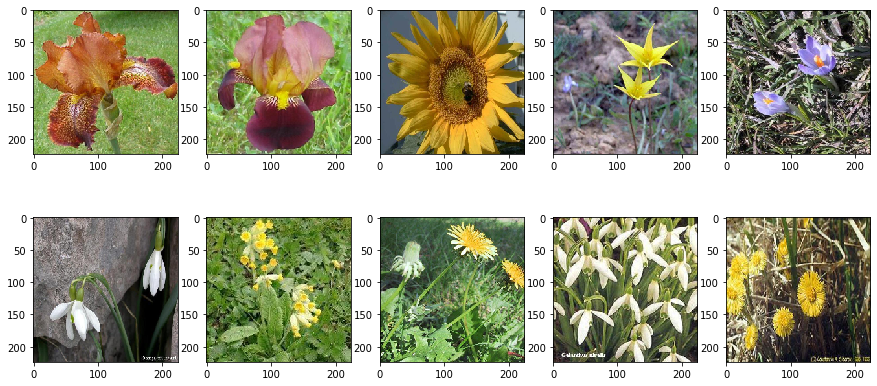

In [3]:
plt.figure()
fig,ax = plt.subplots(2,5)
fig.set_figheight(7)
fig.set_figwidth(15)
ax=ax.flatten()
X,Y=next(train_generator)
for i in range(10): ax[i].imshow(X[i,:,:,:])

## 构建VGG模型 

### 模型建立 

In [7]:
IMSIZE = 224
input_shape = (IMSIZE, IMSIZE, 3)
input_layer = Input(input_shape)
x = input_layer

# 1st Convolution Block
x = Conv2D(64, [3, 3], padding='same', activation='relu')(x)
x = Conv2D(64, [3, 3], padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

# 2nd Convolution Block
x = Conv2D(128, [3, 3], padding='same', activation='relu')(x)
x = Conv2D(128, [3, 3], padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

# 3rd Convolution Block
x = Conv2D(256, [3, 3], padding='same', activation='relu')(x)
x = Conv2D(256, [3, 3], padding='same', activation='relu')(x)
x = Conv2D(256, [3, 3], padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

# 4th Convolution Block
x = Conv2D(512, [3, 3], padding='same', activation='relu')(x)
x = Conv2D(512, [3, 3], padding='same', activation='relu')(x)
x = Conv2D(512, [3, 3], padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

# 5th Convolution Block
x = Conv2D(512, [3, 3], padding='same', activation='relu')(x)
x = Conv2D(512, [3, 3], padding='same', activation='relu')(x)
x = Conv2D(512, [3, 3], padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

# FC Block
x = Flatten()(x)
x = Dense(4096, activation = "relu")(x)
x = Dense(4096, activation = "relu")(x)
x = Dense(17, activation = "softmax")(x)
output_layer = x
model_vgg16 = Model(input_layer, output_layer)
model_vgg16.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0   

### 模型编译及拟合 

In [8]:
model_vgg16.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])
 
model_vgg16.fit(train_generator,epochs=5,validation_data=validation_generator)

Epoch 1/5
60/60 [==============================] - 15s 249ms/step - loss: 2.8338 - accuracy: 0.0599 - val_loss: 2.6601 - val_accuracy: 0.0931
Epoch 2/5
60/60 [==============================] - 11s 177ms/step - loss: 2.5530 - accuracy: 0.1292 - val_loss: 2.4749 - val_accuracy: 0.1544
Epoch 3/5
60/60 [==============================] - 10s 172ms/step - loss: 2.2656 - accuracy: 0.2027 - val_loss: 2.3463 - val_accuracy: 0.3015
Epoch 4/5
60/60 [==============================] - 10s 173ms/step - loss: 1.8867 - accuracy: 0.3403 - val_loss: 1.3640 - val_accuracy: 0.3407
Epoch 5/5
60/60 [==============================] - 10s 175ms/step - loss: 1.6505 - accuracy: 0.4328 - val_loss: 1.2923 - val_accuracy: 0.3578


## 思考：如何在VGG基础上添加BN操作？